# Test of the Ben Sira package

!pip install collatex
!pip install graphviz
!pip install levenshtein
!pip install xmltodict
!pip install beautifulsoup4
!pip install lxml
!pip install textdistance
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install spacy==3.2.2
!pip install hebspacy
!pip install https://github.com/8400TheHealthNetwork/HebSpacy/releases/download/he_ner_news_trf-3.2.1/he_ner_news_trf-3.2.1-py3-none-any.whl

In [1]:
from pkg.Extraction import test, VariantsFinder

[nltk_data] Downloading package punkt to /home/mari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
test()

test


In [3]:
fileNames = ["ms_a_new.xml","ms_b_new.xml","ms_d_new.xml","ms_e_new.xml","ms_f_new.xml"]

In [4]:
vf = VariantsFinder(fileNames)


Manuscript A:  ש̇ מושל ושופט נכב̇דו	ו̇א̊ן גד̇ול מ̊רא א‍להים׃ 
Manuscript B: שר שופט ומושל נכבדו	וא̇ ג̊̊ד̇

('ms_a_new.xml', 'Chapter 10', 'ms_b_new.xml', 'Siracide 10', '24')


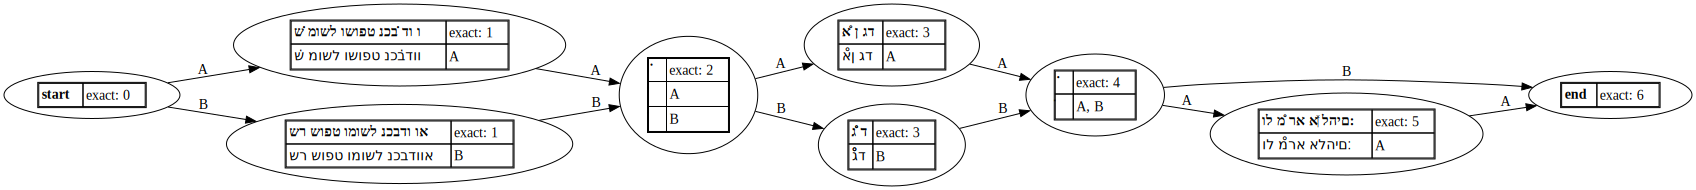

In [5]:
vf.getSampleVariant()